## SEC Data IV: Combine Items

In [2]:
import pandas as pd
import numpy  as np
import os

Example: get data from 2020q3 file:

In [3]:
directory = 'data/sec/merged/'  
filename  = '2020q3.csv'

data = pd.read_csv(directory+filename, parse_dates=['filed','ddate'])
data[:3]

,cik,sic,countryinc,tag,filed,ddate,qtrs,value
0,1551906,7990.0,US,EntityPublicFloat,2020-07-02,2019-06-30,0,3.095520e+05
1,1551906,7990.0,US,EntityCommonStockSharesOutstanding,2020-07-02,2020-06-30,0,3.109520e+09
2,1551906,7990.0,US,AccountsPayableCurrent,2020-07-02,2018-12-31,0,6.022200e+04


Get revenue:

In [4]:
tag = 'RevenueFromContractWithCustomerExcludingAssessedTax'

item = data[data.tag==tag]

item.sort_values('cik')[:10]  # Sort by firm and display first 10 rows

,cik,sic,countryinc,tag,filed,ddate,qtrs,value
294850,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2020-06-30,1,7.328000e+09
294851,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2019-06-30,1,7.979000e+09
294852,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2020-06-30,2,1.505400e+10
294853,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2019-06-30,2,1.551400e+10
1094785,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2020-06-30,1,1.436740e+08
1094786,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2019-06-30,1,4.078000e+08
1094787,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2020-06-30,2,4.796470e+08
1094788,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2019-06-30,2,7.839380e+08
618957,2488,3674.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2020-06-30,1,1.932000e+09
618958,2488,3674.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2019-06-30,1,1.531000e+09


Find most recent values with shortest duration (smallest qtrs):

In [5]:
short = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,False])
short[:10]

,cik,sic,countryinc,tag,filed,ddate,qtrs,value
294853,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2019-06-30,2,1.551400e+10
294851,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2019-06-30,1,7.979000e+09
294852,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2020-06-30,2,1.505400e+10
294850,1800,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2020-06-30,1,7.328000e+09
1094788,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2019-06-30,2,7.839380e+08
1094786,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2019-06-30,1,4.078000e+08
1094787,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2020-06-30,2,4.796470e+08
1094785,2178,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-08-06,2020-06-30,1,1.436740e+08
618960,2488,3674.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2019-06-30,2,2.803000e+09
618958,2488,3674.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-07-29,2019-06-30,1,1.531000e+09


In [6]:
short = short.groupby(['cik','filed']).last()
short[:5]

,,sic,countryinc,tag,ddate,qtrs,value
cik,filed,,,,,,
1800,2020-07-29,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-06-30,1,7.328000e+09
2178,2020-08-06,5172.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-06-30,1,1.436740e+08
2488,2020-07-29,3674.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-06-30,1,1.932000e+09
3116,2020-08-07,2834.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-06-30,1,1.203100e+08
3197,2020-08-05,3564.0,US,RevenueFromContractWithCustomerExcludingAssess...,2020-06-30,1,7.517000e+07


After we selected our rows, we only need the value and qtrs columns:

In [7]:
short = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,False])

short = short.groupby(['cik','filed']).last() [['value','qtrs']]
short[:5]

,,value,qtrs
cik,filed,,
1800,2020-07-29,7.328000e+09,1
2178,2020-08-06,1.436740e+08,1
2488,2020-07-29,1.932000e+09,1
3116,2020-08-07,1.203100e+08,1
3197,2020-08-05,7.517000e+07,1


Same for longest duration (largest qtrs):

In [8]:
long = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,True])
long = long.groupby(['cik','filed']).last()[['value','qtrs']]
long[:5]

,,value,qtrs
cik,filed,,
1800,2020-07-29,1.505400e+10,2
2178,2020-08-06,4.796470e+08,2
2488,2020-07-29,3.718000e+09,2
3116,2020-08-07,3.250030e+08,2
3197,2020-08-05,1.556560e+08,2


Put short and long next to each other:

In [14]:
short_long = short.join(long, lsuffix = '_shortest', rsuffix = '_longest')
short_long[:10]

value_shortest  qtrs_shortest  value_longest  qtrs_longest
cik  filed                                                                 
1750 2020-07-21     -16500000.0              1   4.400000e+06             4
     2020-09-24     -14500000.0              1  -1.450000e+07             1
1800 2020-07-29     537000000.0              1   1.101000e+09             2
1961 2020-08-13       -419314.0              1  -7.403690e+05             2
2098 2020-08-10       3199000.0              1   4.476000e+06             2
2178 2020-08-06       3503000.0              1  -7.924000e+06             2
2186 2020-08-05       -302000.0              1  -1.494000e+06             2
2488 2020-07-29     157000000.0              1   3.190000e+08             2
2969 2020-07-23     446500000.0              1   1.399900e+09             3
3116 2020-08-07     -68662000.0              1  -3.253890e+08             2

Get multiple tags:

In [15]:
tags = ['RevenueFromContractWithCustomerExcludingAssessedTax','NetIncomeLoss']

results = {t:pd.DataFrame() for t in tags}                #Creates empty table/DataFrame for each entry in 'tags'

for t in tags:                                            # Loop over all tags.

    item  = data[data.tag==t]                             # Select all data for this tag.

    short = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,False]) # Samllest qrts.
    long  = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,True])  # Largest  qtrs.
    
    short = short.groupby(['cik','filed']).last()[['value','qtrs']]     # One value for each firm and filing.
    long  = long .groupby(['cik','filed']).last()[['value','qtrs']]     
    
    short_long = short.join(long, lsuffix='_shortest', rsuffix='_longest') # Put shortest and longest next to each other.

    results[t] = results[t].append( short_long )  

All revenues:

In [16]:
results['RevenueFromContractWithCustomerExcludingAssessedTax'][:5]

,,value_shortest,qtrs_shortest,value_longest,qtrs_longest
cik,filed,,,,
1800,2020-07-29,7.328000e+09,1,1.505400e+10,2
2178,2020-08-06,1.436740e+08,1,4.796470e+08,2
2488,2020-07-29,1.932000e+09,1,3.718000e+09,2
3116,2020-08-07,1.203100e+08,1,3.250030e+08,2
3197,2020-08-05,7.517000e+07,1,1.556560e+08,2


All earnings:

In [17]:
results['NetIncomeLoss'][:5]

value_shortest  qtrs_shortest  value_longest  qtrs_longest
cik  filed                                                                 
1750 2020-07-21     -16500000.0              1   4.400000e+06             4
     2020-09-24     -14500000.0              1  -1.450000e+07             1
1800 2020-07-29     537000000.0              1   1.101000e+09             2
1961 2020-08-13       -419314.0              1  -7.403690e+05             2
2098 2020-08-10       3199000.0              1   4.476000e+06             2

Now loop over multiple files and multiple tags:

In [18]:
os.remove('data/sec/merged/.DS_Store')

FileNotFoundError: [Errno 2] No such file or directory: 'data/sec/merged/.DS_Store'

In [19]:
filenames = os.listdir(directory)  [:5] 

results   = {t:pd.DataFrame() for t in tags}                  # Dictionary of tables (1 table for each tag)

for filename in filenames:                                    # Loop over all files.
    if not filename.startswith('.'):
        data = pd.read_csv(directory+filename, parse_dates=['filed','ddate'])  # Read the file.
        print(filename)

        for t in tags:                                            # Loop over all tags.
            item  = data[data.tag==t]                             # Select all data for this tag.
            short = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,False]) # Samllest qrts.
            long  = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,True])  # Largest  qtrs.
            short = short.groupby(['cik','filed']).last()[['value','qtrs']]     # One value for each firm and filing.
            long  = long .groupby(['cik','filed']).last()[['value','qtrs']]     
            short_long = short.join(long, lsuffix='_shortest', rsuffix='_longest') # Put shortest and longest next to each other.
            results[t] = results[t].append( short_long )  

2018q4.csv
2018q3.csv
2018q2.csv
2021_01.csv
2018q1.csv


Check results:

In [20]:
results['NetIncomeLoss']

,,value_shortest,qtrs_shortest,value_longest,qtrs_longest
cik,filed,,,,
1750,2018-12-19,7000000.0,1,2.210000e+07,2
1800,2018-10-31,563000000.0,1,1.714000e+09,3
1961,2018-11-14,40749.0,1,-5.701750e+05,3
2034,2018-11-09,-21092000.0,1,-2.109200e+07,1
2098,2018-11-09,807000.0,1,4.007000e+06,3
...,...,...,...,...,...
1719406,2018-03-23,-105033.0,1,-1.050330e+05,1
1719489,2018-02-09,-145928.0,1,-1.459280e+05,1
1721478,2018-02-14,-1250.0,1,-1.250000e+03,1


Sort the result by filedate:

In [23]:
results['NetIncomeLoss'] = results['NetIncomeLoss'].sort_index(level='filed')
results['NetIncomeLoss']

,,value_shortest,qtrs_shortest,value_longest,qtrs_longest
cik,filed,,,,
863894,2018-01-02,-2679335.0,1,-6612047.0,4
1392694,2018-01-02,-967577.0,1,-967577.0,1
1606364,2018-01-02,-103693.0,1,-183631.0,2
1619227,2018-01-02,-7928.0,1,-53505.0,3
1634293,2018-01-02,-61443.0,4,-61443.0,4
...,...,...,...,...,...
1527102,2021-01-29,-183760.0,1,-1195973.0,3
1550603,2021-01-29,-546000.0,1,3601000.0,4
1551887,2021-01-29,-485916.0,4,-485916.0,4


Put all of this into a function:

In [24]:
def get_items_from_SEC_files(tags, filename=None):                # Function input: list of tags, optional filename.

    directory = 'data/sec/merged/'                                # Read data from here.
    filenames = [filename] if filename else os.listdir(directory) # Supplied filename or all files in "merged" directory.

    results   = {t:pd.DataFrame() for t in tags}                  # Dictionary of tables (1 table for each tag)

    for filename in filenames:                                    # Loop over all files.
         if not filename.startswith('.'):
                data = pd.read_csv(directory+filename, parse_dates=['filed','ddate'])  # Read the file.
                print(filename)
        
                for t in tags:                                            # Loop over all tags.
                    item  = data[data.tag==t]                             # Select all data for this tag.
                    short = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,False]) # Samllest qrts.
                    long  = item.sort_values(['cik','filed','ddate','qtrs'], ascending=[True,True,True,True])  # Largest  qtrs.
                    short = short.groupby(['cik','filed']).last()[['value','qtrs']]     # One value for each firm and filing.
                    long  = long .groupby(['cik','filed']).last()[['value','qtrs']]     
                    short_long = short.join(long, lsuffix='_shortest', rsuffix='_longest') # Put shortest and longest next to each other.
                    results[t] = results[t].append( short_long )  
                        
    for t in tags:                                                # Now sort all tables by filing date.
        if not results[t].empty: results[t] = results[t].sort_index(level='filed')            

    return results

Optional arguments for functions:

In [25]:
def do_this(a, b=1):
    print(a,b)
    
do_this(5)

5 1


In [26]:
do_this(5, b = 6)

5 6


Use the function to get items from specific file:

In [27]:
tags = ['RevenueFromContractWithCustomerExcludingAssessedTax','NetIncomeLoss']

items = get_items_from_SEC_files(tags, filename='2020q2.csv')

2020q2.csv


Check result:

In [28]:
items['NetIncomeLoss'][:5]

,,value_shortest,qtrs_shortest,value_longest,qtrs_longest
cik,filed,,,,
18498,2020-04-01,35562000.0,1,6.138400e+07,4
56873,2020-04-01,327000000.0,1,1.659000e+09,4
78239,2020-04-01,417300000.0,4,4.173000e+08,4
744187,2020-04-01,4402000.0,1,7.427000e+06,4
795266,2020-04-01,59748000.0,1,5.974800e+07,1


Use the function to get items from all files:

In [29]:
tags = ['RevenueFromContractWithCustomerExcludingAssessedTax','SalesRevenueNet','Revenues']

items = get_items_from_SEC_files(tags)

2018q4.csv
2018q3.csv
2018q2.csv
2021_01.csv
2018q1.csv
2020q2.csv
2020q3.csv
2020q1.csv
2019q4.csv
2019q1.csv
2019q3.csv
2019q2.csv
2013q4.csv
2015q2.csv
2015q3.csv
2017q1.csv
2020_12.csv
2020_10.csv
2017q3.csv
2015q1.csv
2017q2.csv
2011q4.csv
2020_11.csv
2013q2.csv
2015q4.csv
2011q1.csv
2013q3.csv
2013q1.csv
2011q3.csv
2017q4.csv
2011q2.csv
2009q4.csv
2014q1.csv
2016q3.csv
2010q4.csv
2016q2.csv
2014q2.csv
2012q4.csv
2016q1.csv
2014q3.csv
2009q2.csv
2010q3.csv
2012q1.csv
2010q2.csv
2016q4.csv
2009q3.csv
2009q1.csv
2014q4.csv
2012q2.csv
2012q3.csv
2010q1.csv


Check revenue for Apple:

In [30]:
items['RevenueFromContractWithCustomerExcludingAssessedTax'].loc[320193]

,value_shortest,qtrs_shortest,value_longest,qtrs_longest
filed,,,,
2019-01-30,8.431000e+10,1,8.431000e+10,1
2019-05-01,5.801500e+10,1,1.423250e+11,2
2019-07-31,5.380900e+10,1,1.961340e+11,3
2019-10-31,6.404000e+10,1,2.601740e+11,4
2020-01-29,9.181900e+10,1,9.181900e+10,1
2020-05-01,5.831300e+10,1,1.501320e+11,2
2020-07-31,5.968500e+10,1,2.098170e+11,3
2020-10-30,6.469800e+10,1,2.745150e+11,4
2021-01-28,1.114390e+11,1,1.114390e+11,1


In [75]:
tags[0]

'RevenueFromContractWithCustomerExcludingAssessedTax'

In [76]:
tags[1]

'SalesRevenueNet'

In [47]:
tags[2]

'Revenues'

Compare all 3 tags for Apple:

In [48]:
cik = 320193

t = pd.DataFrame(index = pd.date_range('2009','2021')) # Create empty table with dates from 2009 to 2021.

#t[tags[0]] = items[tags[0]].loc[cik].value_shortest
#t[tags[1]] = items[tags[1]].loc[cik].value_shortest
#t[tags[2]] = items[tags[2]].loc[cik].value_shortest

t#.dropna(how='all') 

""
2009-01-01
2009-01-02
2009-01-03
2009-01-04
2009-01-05
...
2020-12-28
2020-12-29
2020-12-30
2020-12-31


In [49]:
cik = 320193

t = pd.DataFrame(index = pd.date_range('2009','2021')) # Create table with dates from 2009 to 2021.

t[tags[0]] = items[tags[0]].loc[cik].value_shortest
t[tags[1]] = items[tags[1]].loc[cik].value_shortest
t[tags[2]] = items[tags[2]].loc[cik].value_shortest

t.dropna(how='all') 

,RevenueFromContractWithCustomerExcludingAssessedTax,SalesRevenueNet,Revenues
2009-07-22,NaN,8.337000e+09,NaN
2009-10-27,NaN,3.653700e+10,NaN
2010-01-25,NaN,1.568300e+10,NaN
2010-04-21,NaN,1.349900e+10,NaN
2010-07-21,NaN,1.570000e+10,NaN
2010-10-27,NaN,2.034300e+10,NaN
2011-01-19,NaN,2.674100e+10,NaN
2011-04-21,NaN,2.466700e+10,NaN
2011-07-20,NaN,2.857100e+10,NaN
2011-10-26,NaN,2.827000e+10,NaN


We can combine the items like this:

In [50]:
# Example:
t1 = pd.DataFrame({'A':[1,2,np.nan],               },  index=['a','b','c'])
t2 = pd.DataFrame({'A':[10,20,30], 'B':[40,50,60]  },  index=['a','b','c'])

t1.combine_first(t2)

,A,B
a,1.0,40.0
b,2.0,50.0
c,30.0,60.0


In [51]:
sales = items[tags[0]].combine_first( items[tags[1]] ).combine_first( items[tags[2]] )
sales

value_shortest qtrs_shortest  value_longest qtrs_longest
cik     filed                                                               
1750    2010-09-23    4.121970e+08             1   4.121970e+08            1
        2010-12-21    4.470540e+08             1   8.592510e+08            2
        2011-03-22    4.510310e+08             1   1.295946e+09            3
        2011-07-13    1.775782e+09             4   1.775782e+09            4
        2011-09-23    4.792900e+08             1   4.792900e+08            1
...                            ...           ...            ...          ...
1820872 2020-11-13    0.000000e+00             1   0.000000e+00            3
1821160 2020-12-04    5.635440e+08             1   1.167841e+09            3
1822462 2020-12-04    1.790000e+05             1   1.790000e+05            3
1823365 2020-12-23    5.860000e+05             1   1.801000e+06            3
1825079 2021-01-15    0.000000e+00             0   0.000000e+00            0

[178078 rows x 4 columns]

Now compare all 3 items and "sales":

In [46]:
cik = 320193

t = pd.DataFrame(index = pd.date_range('2009','2021')) # Create table with dates from 2009 to 2021.

t[tags[0]] = items[tags[0]].loc[cik].value_shortest
t[tags[1]] = items[tags[1]].loc[cik].value_shortest
t[tags[2]] = items[tags[2]].loc[cik].value_shortest

t['Sales'] = sales.loc[cik].value_shortest

t.dropna(how='all') 

,RevenueFromContractWithCustomerExcludingAssessedTax,SalesRevenueNet,Revenues,Sales
2009-07-22,NaN,8.337000e+09,NaN,8.337000e+09
2009-10-27,NaN,3.653700e+10,NaN,3.653700e+10
2010-01-25,NaN,1.568300e+10,NaN,1.568300e+10
2010-04-21,NaN,1.349900e+10,NaN,1.349900e+10
2010-07-21,NaN,1.570000e+10,NaN,1.570000e+10
2010-10-27,NaN,2.034300e+10,NaN,2.034300e+10
2011-01-19,NaN,2.674100e+10,NaN,2.674100e+10
2011-04-21,NaN,2.466700e+10,NaN,2.466700e+10
2011-07-20,NaN,2.857100e+10,NaN,2.857100e+10
2011-10-26,NaN,2.827000e+10,NaN,2.827000e+10


And now we can get the entire sales history for any firm like this:

In [56]:
# Get ticker symbol file from SEC
symbols = pd.read_json('https://www.sec.gov/files/company_tickers.json').transpose().set_index('cik_str')
symbols[:10]

,ticker,title
cik_str,,
320193,AAPL,Apple Inc.
789019,MSFT,MICROSOFT CORP
1018724,AMZN,AMAZON COM INC
1652044,GOOG,Alphabet Inc.
1293451,TCEHY,Tencent Holdings Ltd
1318605,TSLA,"Tesla, Inc."
1326801,FB,Facebook Inc
1577552,BABA,Alibaba Group Holding Ltd
1046179,TSM,TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD


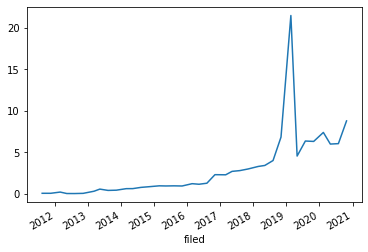

In [61]:
cik = symbols[symbols.ticker=='TSLA'].index[0]

sales.loc[cik].value_shortest.div(10**9).plot()           # Plot quarterly sales in USD billion